In [1]:
import networkx as NX
import numpy as np
import pylab as P

%matplotlib inline

# Exercise B.2

Construct metablite/reaction graph 'fructose anaerobic'

In [2]:
def read_MR_txt(path='fructoseanaerobicfluxgraph.txt'):
    with open(path) as f:
        txt = f.read()
    lines = txt.split('\n')
    nl = []
    el = []
    
    for line in lines:
        ll = line.split(';')
        if len(ll)==1:
            nl = nl + ll
        elif len(ll)==3:
            el.append(ll)

    return nl, el

In [3]:
def draw_MR_Graph(nl, el):
    '''draw metabolite/reaction graph
    nl: node list
    el: edge list
    '''
    G = NX.Graph()

    rNodes = []
    mNodes = []
    for n in nl:
        G.add_node(n)
        if n[0] == 'R':
            rNodes.append(n)
        else:
            mNodes.append(n)

    nodes = {}
    nodes['R'] = rNodes
    nodes['M'] = mNodes

    nodeColor = {'R':'#0DFF0D', 'M':'#FF0D0D'}
    
    for e in el:
        if e[0][0] == 'M' and e[1][0] == 'R':
            direction = 'reactant' # M -> R
        else:
            direction = 'product' # R -> M

        G.add_edge(e[0], e[1], 
                   weight=float(e[2]),
                   direction=direction)

    fig = P.figure()
    pos = NX.spring_layout(G, iterations=5000)
    for nodetype in ['R', 'M']:
        for node in nodes[nodetype]:
            total_weight = 0
            for neighbour in G.neighbors(node):
                edge_data = G.get_edge_data(node, neighbour)
                total_weight = total_weight + edge_data['weight']

            NX.draw_networkx_nodes(G, pos,
                                   nodelist=[node],
                                   node_color=nodeColor[nodetype],
                                   node_size=total_weight)

    NX.draw_networkx_edges(G, pos)
    labels = {}
    for node in G.nodes():
        labels[node] = node
    NX.draw_networkx_labels(G, pos, labels,
                            font_color='black',
                            font_family='sans-serif',
                            font_size=9)
    fig.suptitle('Fructose Anaerobic')
    P.show()
    return G

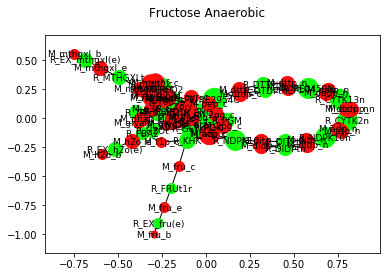

In [4]:
txt = "fructoseanaerobicfluxgraph.txt"
nl, el = read_MR_txt(path=txt)
G = draw_MR_Graph(nl, el)

## Calculate the distance

calculate the distance from root `R_DM_apt_c_` to all of the other nodes in the graph.
With or without the weights

The following calculates the distance using my implementation of Dijkstra algorithm.

In [5]:
def my_dijkstra(source, G, weight=1):    
    # initialize Green and Red set
    Green = [source]
    Red = list(G.nodes())
    Red.remove(source)
    dist = {}
    
    for n in Red:
        #  infinity
        dist[n] = float('inf')
    dist[source] = 0

    while Red:
#         min_dist = float('inf')
        for n in G.neighbors(Green[-1]):
            if n in Red:
                if isinstance(weight, int):
                    cost = weight
                elif isinstance(weight, str):
                    edge_data = G.get_edge_data(Green[-1], n)
                    cost = edge_data[weight]
                
                if dist[n] > dist[Green[-1]] + cost:
                    dist[n] = dist[Green[-1]] + cost
                
        x = min(Red, key=lambda x: dist[x])
        # choose minimal in Red set
        Green.append(x)
        Red.remove(x)
    
    return dist

d1 = my_dijkstra('R_DM_atp_c_', G, weight='weight')
d2 = my_dijkstra('R_DM_atp_c_', G, weight=1)

print 'Source node R_DM_atp_c_ weighted distance:'
for k,v in d1.items():
    print k,':', v

print '\nSource node R_DM_atp_c_ unweighted distance:'
for k,v in d2.items():
    print k, ':', v

Source node R_DM_atp_c_ weighted distance:
M_13dpg_c : 300.0
M_mlthf_c : 500.0
M_dadp_n : 700.0
M_glyc_c : 200.0
R_CYTK2n : 800.0
R_NDPK10n : 600.0
M_g3p_c : 300.0
M_h_c : 100.0
R_G3PD1 : 150.0
M_dhap_c : 200.0
R_DTTPtn : 400.0
M_pyr_c : 300.0
M_atp_n : 700.0
R_NDPK10 : 200.0
M_nadh_c : 200.0
M_glyald_c : 200.0
M_glyc3p_c : 200.0
M_dtdp_c : 300.0
R_TPI : 300.0
M_atp_c : 100.0
R_PGM : 400.0
R_KHK : 150.0
M_ditp_c : 300.0
R_RE2954C : 200.0
M_nad_c : 200.0
M_ditp_n : 500.0
R_MTHFD : 350.0
M_mthgxl_c : 300.0
M_mthgxl_b : 700.0
R_FBA2 : 250.0
M_3pg_c : 300.0
M_dcmp_n : 900.0
M_nadp_c : 200.0
R_EX_fru(e) : 350.0
M_h2o_c : 100.0
M_h2o_b : 500.0
M_didp_n : 500.0
R_EX_h2o(e) : 400.0
M_2pg_c : 300.0
R_MTHFD2 : 350.0
R_r0245 : 150.0
R_r0055 : 200.0
M_adp_n : 700.0
R_MTHGXLt : 400.0
M_dcdp_n : 900.0
R_PGK : 200.0
M_pep_c : 300.0
R_EX_mthgxl(e) : 600.0
M_adp_c : 100.0
M_f1p_c : 200.0
M_nadph_c : 200.0
M_methf_c : 500.0
R_ENO : 200.0
R_H2Ot : 200.0
M_fru_e : 300.0
M_dtdp_n : 500.0
M_fru_c : 200.0
M_

Using Dijkstra in module `networkx`.
After comparing the result, we can see that the it is the same as `my_dijkstra`.

In [6]:
for node in G.nodes():
    print "R_DM_atp_c_ ->", node, "(unweighted):",\
        NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node, weight=1)
    print "R_DM_atp_c_ ->", node, "(weighted):",\
        NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node)
    print ""

R_DM_atp_c_ -> M_13dpg_c (unweighted): 3
R_DM_atp_c_ -> M_13dpg_c (weighted): 300.0

R_DM_atp_c_ -> M_mlthf_c (unweighted): 5
R_DM_atp_c_ -> M_mlthf_c (weighted): 500.0

R_DM_atp_c_ -> M_dadp_n (unweighted): 7
R_DM_atp_c_ -> M_dadp_n (weighted): 700.0

R_DM_atp_c_ -> M_glyc_c (unweighted): 3
R_DM_atp_c_ -> M_glyc_c (weighted): 200.0

R_DM_atp_c_ -> R_KHK (unweighted): 2
R_DM_atp_c_ -> R_KHK (weighted): 150.0

R_DM_atp_c_ -> M_g3p_c (unweighted): 3
R_DM_atp_c_ -> M_g3p_c (weighted): 300.0

R_DM_atp_c_ -> R_EX_fru(e) (unweighted): 6
R_DM_atp_c_ -> R_EX_fru(e) (weighted): 350.0

R_DM_atp_c_ -> M_glyald_c (unweighted): 3
R_DM_atp_c_ -> M_glyald_c (weighted): 200.0

R_DM_atp_c_ -> M_dhap_c (unweighted): 3
R_DM_atp_c_ -> M_dhap_c (weighted): 200.0

R_DM_atp_c_ -> R_DTTPtn (unweighted): 4
R_DM_atp_c_ -> R_DTTPtn (weighted): 400.0

R_DM_atp_c_ -> M_pyr_c (unweighted): 3
R_DM_atp_c_ -> M_pyr_c (weighted): 300.0

R_DM_atp_c_ -> M_atp_n (unweighted): 7
R_DM_atp_c_ -> M_atp_n (weighted): 700.0

R_

## some statistics about the degree in the graph

- the degree distribution
- the average degree
- the variance of degree
- rank by degree: hubs

In [7]:
import matplotlib.pyplot as plt

def degree_stats(G):
    total_degree = 0
    numN = 0
    degree_distr = {}
    for t in G.adjacency():
        degree = len(t[1])
        if degree_distr.has_key(degree):
            degree_distr[degree] += 1
        else:
            degree_distr[degree] = 1
        total_degree += len(t[1])
        numN += 1
    
    draw_bar(degree_distr)
    mean_degree = float(total_degree) / numN
    print "Average degree", mean_degree
    
    # calculate variance
    var = 0.0
    for t in G.adjacency():
        degree = len(t[1])
        var += (degree - mean_degree)**2
    var = var / numN
    print "variance:", var
    
    adj = G.adj
    s = sorted(adj, key=lambda x: len(adj[x]))
    hubs = list()
    for n in s:
        hubs.append((n, len(adj[n])))
    print hubs
    winner = hubs[len(hubs)-1]
    print "Node", winner[0], "has the greatest degree:", winner[1]
    
    
def draw_bar(distr):
    N = max(distr.keys()) + 1
    for i in xrange(N):
        if not distr.has_key(i):
            distr[i] = 0
    # change dict into array
    y = []
    for x in xrange(N):
        y.append(distr[x])

    fig, ax = plt.subplots()
    rects = ax.bar(np.arange(N), y, 0.5, color="b")
    ax.set_ylabel("number of occurences")
    ax.set_xlabel("degree")
    ax.set_title("Degree Distribution")
    plt.show()
    

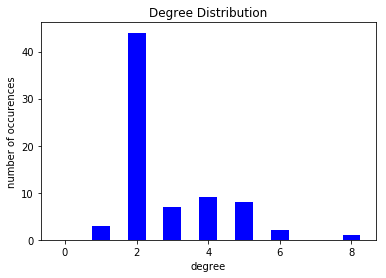

Average degree 2.81081081081
variance: 1.85609934259
[('M_mthgxl_b', 1), ('M_h2o_b', 1), ('M_fru_b', 1), ('M_13dpg_c', 2), ('M_mlthf_c', 2), ('M_dadp_n', 2), ('M_glyc_c', 2), ('M_g3p_c', 2), ('R_EX_fru(e)', 2), ('M_glyald_c', 2), ('R_DTTPtn', 2), ('M_pyr_c', 2), ('M_atp_n', 2), ('M_glyc3p_c', 2), ('R_PGM', 2), ('R_TPI', 2), ('M_3pg_c', 2), ('R_EX_h2o(e)', 2), ('M_dtdp_c', 2), ('M_ditp_c', 2), ('M_fru_c', 2), ('M_ditp_n', 2), ('M_mthgxl_c', 2), ('R_EX_mthgxl(e)', 2), ('R_FRUt1r', 2), ('M_didp_c', 2), ('M_didp_n', 2), ('M_2pg_c', 2), ('M_adp_n', 2), ('R_MTHGXLt', 2), ('M_mthgxl_e', 2), ('M_dcdp_n', 2), ('M_h2o_e', 2), ('M_pep_c', 2), ('R_DITPtn', 2), ('M_f1p_c', 2), ('M_methf_c', 2), ('R_H2Ot', 2), ('M_fru_e', 2), ('M_dtdp_n', 2), ('M_dcmp_n', 2), ('R_DIDPtn', 2), ('M_pi_c', 2), ('M_dttp_n', 2), ('M_datp_n', 2), ('R_DTDPtn', 2), ('M_dttp_c', 2), ('M_dhap_c', 3), ('R_FBA2', 3), ('M_nadp_c', 3), ('M_nadph_c', 3), ('R_ENO', 3), ('M_nad_c', 3), ('M_nadh_c', 3), ('R_NDPK10', 4), ('R_NDPK10n',

In [8]:
degree_stats(G)

# Exercise B.3

Compartment property of metabolite and reaction

1. construct a frequency table for the number of nodes of the graph 'fructose anaerobic' that belong to a certain compartment

> The term compartment is used in at least two ways in modeling of biological processes, sometimes leading to confusion when models from different communities are being discussed.

>The first meaning, used in modern multicompartment modeling of the sort that SBML users do, is in the sense of a vessel or container. This kind of compartment typically has the properties of location, size (usually but not always in three dimensions, and usually but not always fixed in size), and a name or identity; importantly, the compartment is not intrinsically associated with a single substance or chemical species, but instead, one or more substances are located inside the compartment. Compartments in this sense are usually assumed to be homogeneous or well-mixed, and the concentration of each species is usually taken to be an individual state variable in the model. (Sometimes, the species are referred to as pools, and the compartments are thus groupings of pools.)

>By contrast, the second meaning of compartment is a substance in a location. In this second meaning, there is no notion of a container; rather, each distinct kind of substance in a location (e.g., glucose in the liver) is a compartment. This notion of compartment comes from the "bathtub models" and is still largely in use in ecological modeling or in phamacometrics modeling. For instance "glucose in the liver" and "glucose in blood" are different compartments, but "glucose in blood" and "drug in blood" are also different compartments.

>The former sense, used by SBML, is fairly common in systems biology and engineering models today. An advantage of this approach is that it allows for the intuition of identifying compartments with biological structures, then talking about what happens within and between those structures. For example, a model might have compartments corresponding to such things as cytoplasm, nucleus, nuclear membrane, etc., with many different kinds of chemical entities located inside each compartment. This style of compartmental modeling is by no means new; one can find examples going back many decades. Some segments of pharmacometrics today also use compartments as vessels; this is the case for example in Physiologically-based pharmacokinetic modeling.

>Finally, in this context, it is worth mentioning that in SBML, there is no requirement for compartment to correspond strictly to cellular structures. Indeed, while SBML uses terms like "species", "reaction", "compartment", it is more of a historical artifact than a limitation of sticking to purely biochemical modeling. SBML is used for more than biochemical models today. 

c : ['M_13dpg_c', 'M_mlthf_c', 'M_glyc_c', 'R_KHK', 'M_g3p_c', 'M_glyald_c', 'M_dhap_c', 'R_DTTPtn', 'M_pyr_c', 'R_NDPK10', 'R_G3PD1', 'M_glyc3p_c', 'R_PGM', 'R_TPI', 'M_atp_c', 'M_3pg_c', 'M_dtdp_c', 'M_ditp_c', 'R_RE2954C', 'M_fru_c', 'R_MTHFD', 'M_mthgxl_c', 'R_FBA2', 'R_GAPD', 'R_GLYK', 'R_FRUt1r', 'M_didp_c', 'M_h2o_c', 'M_h_c', 'M_2pg_c', 'R_MTHFD2', 'M_nadp_c', 'R_r0055', 'R_MTHGXLt', 'M_pep_c', 'M_adp_c', 'R_DITPtn', 'M_f1p_c', 'M_nadph_c', 'M_methf_c', 'R_ENO', 'R_H2Ot', 'M_nad_c', 'R_PGK', 'R_DIDPtn', 'M_pi_c', 'M_nadh_c', 'R_DM_atp_c_', 'R_r0245', 'R_DTDPtn', 'M_dttp_c'] 

b : ['R_EX_fru(e)', 'R_EX_h2o(e)', 'M_mthgxl_b', 'R_EX_mthgxl(e)', 'M_h2o_b', 'M_fru_b'] 

e : ['M_mthgxl_e', 'M_h2o_e', 'M_fru_e'] 

n : ['M_dadp_n', 'M_atp_n', 'R_NDPK10n', 'M_ditp_n', 'M_didp_n', 'M_adp_n', 'M_dcdp_n', 'R_RE0453N', 'M_dtdp_n', 'R_CYTK2n', 'M_dcmp_n', 'M_dttp_n', 'R_CYTK13n', 'M_datp_n'] 

True


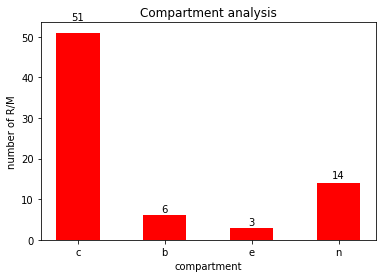

In [9]:
def compartment_analysis(G):
    freq_table = {}
    for node in G.nodes():
        # a metablite
        if node[0] == 'M':
            compartment = node[-1]

        else:
            d = {}
            for n in G.neighbors(node):
                if d.has_key(n[-1]):
                    d[n[-1]] += 1
                else:
                    d[n[-1]] = 1
            # compartment of reaction
            compartment = max(d, key=lambda x:d[x])

        if freq_table.has_key(compartment):
            freq_table[compartment].append(node)
        else:
            freq_table[compartment] = [node]
            
    fig, ax = plt.subplots()
    ind = np.arange(len(freq_table))
    rects = ax.bar(ind, [len(x) for x in freq_table.values()], 0.5, color="r")
    ax.set_xticks(ind)
    ax.set_xticklabels(freq_table.keys())
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
    ax.set_ylabel("number of R/M")
    ax.set_xlabel("compartment")
    ax.set_title("Compartment analysis")
    
    return freq_table


freq_table = compartment_analysis(G)     
node_num = 0
for k,v in freq_table.items():
    print k,":", v, "\n"
    node_num += len(v)
    
print node_num == len(G.nodes())

According to the output **above**, there are 4 reactions in 'fructose anaerobic' graph that happen in compartment nucleus.

1. R_NDPK10n: nucleoside-diphosphate kinase (ATP:dIDP), nuclear
2. R_RE0453N: Nucleoside-diphosphate kinase (name from [EMBL-EBI website](http://www.ebi.ac.uk/intenz/query?cmd=SearchEC&ec=2.7.4.6))
3. R_CYTK2n: cytidylate kinase (dCMP),nuclear https://www.rhea-db.org/reaction.xhtml?id=25094
4. R_CYTK13n: cytidylate kinase (dCMP,dATP),nuclear (UMP/CMP kinase)

Only the following steps of anaerobic respiration process strictly happen in cytoplasm.

- First step: C6H12O6 + Enzyme -> 2 C3H4O3 + 4\[H\] + 2ATP
- Second step: 2 C3H4O3 + 4\[H\] + Enzyme -> 2 C3H6O3



These reaction are all about kinase reactions. From my perspective, I think this is possilbe. Although anaerobic respiration is regarded to only happen in cytoplasm and these reactions are in the fructose anaerobic graph, these reactions are related the consumption of ATP, not synthesis. During the anaerobic respiration process, the cell still need to consume ATP to provide energy for vital activity.

I guess these reactions are vital for the cells all the time and hence is included in this graph. Since they are vital, It is not possible to construct a graph that has the same maximum flux value for 'R_DM_atp_'.
